# Аналитика первого платежа


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
datka = pd.read_csv('paymentss.csv', sep= ';')
datka


,payments.Amount,payments.Amount_in_USD,payments.App_version,payments.Cheater,payments.Country,payments.Currency,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Device,"TO_TIMESTAMP(payments.Install_date, 'YYYY-MM-DD HH24:MI')",payments.Language,payments.OS_version,payments.Payments_count,payments.Payments_sum,payments.Product_name,payments.Tester,payments.Transaction_ID,payments.User_level,payments.Valid,payments.devtodev_ID
0,0.99,0.990000,0.31.0.1882,False,United States,USD,2021-02-01 10:32,MOTOROLA MOTO G8 PLUS,2021-02-01 09:37,en,10.0,1,0.990000,com.exile.weaponsalloffer,False,GPA.3301-5979-0648-00018,6,True,1339805
1,135.00,1.778715,0.31.0.1882,False,Russian Federation,RUB,2021-02-02 16:19,HONOR 20,2021-02-01 06:17,ru,10.0,1,1.778715,com.exile.bag2offer,False,GPA.3308-1766-0774-56107,28,True,1339620
2,135.00,1.778715,0.31.0.1882,False,Russian Federation,RUB,2021-02-03 02:47,HONOR 20,2021-02-01 06:17,ru,10.0,2,3.557429,com.exile.bag2offer,False,GPA.3352-9821-0978-96293,29,True,1339620
3,299.00,3.939524,0.31.0.1882,False,Russian Federation,RUB,2021-02-03 02:48,HONOR 20,2021-02-01 06:17,ru,10.0,3,7.496953,com.exile.weaponstier3,False,GPA.3367-2906-3783-59187,29,True,1339620
4,299.00,3.939181,0.31.0.1882,False,Russian Federation,RUB,2021-02-03 13:08,HONOR 20,2021-02-01 06:17,ru,10.0,4,11.436134,com.exile.weaponstier3,False,GPA.3385-7352-0252-07751,36,True,1339620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,6.99,6.990000,0.33.0.1969,False,United States,USD,2021-03-30 17:29,GALAXY A51 5G,2021-03-29 22:25,en,10.0,5,16.949999,com.exile.miniboss2offer,False,GPA.3329-3016-8031-92307,20,True,1502727
2933,1.99,1.990000,0.33.0.1969,False,United States,USD,2021-03-31 01:51,GALAXY A51 5G,2021-03-29 22:25,en,10.0,6,18.939999,com.exile.boxes10resoffer,False,GPA.3321-6945-6921-43441,22,True,1502727
2934,11.99,11.990000,0.33.0.1969,False,United States,USD,2021-03-31 16:40,GALAXY S8+,2021-03-25 16:14,en,7.1,5,35.450000,com.exile.chestoffer3,False,GPA.3322-1159-0560-09472,16,True,1492838
2935,16.99,16.990000,0.33.0.1969,False,United States,USD,2021-04-02 16:16,GALAXY S8+,2021-03-25 16:14,en,7.1,6,52.440000,com.exile.weaponsarmortier3pack,False,GPA.3371-0779-0696-52177,21,True,1492838


Сгенерируем датасет с нужными нам переменными

In [44]:
datka_new = datka[['payments.Amount_in_USD', "TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",'payments.Transaction_ID', 'payments.Product_name', 'payments.devtodev_ID', 'payments.User_level']]
datka_new

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.devtodev_ID,payments.User_level
0,0.990000,2021-02-01 10:32,GPA.3301-5979-0648-00018,com.exile.weaponsalloffer,1339805,6
1,1.778715,2021-02-02 16:19,GPA.3308-1766-0774-56107,com.exile.bag2offer,1339620,28
2,1.778715,2021-02-03 02:47,GPA.3352-9821-0978-96293,com.exile.bag2offer,1339620,29
3,3.939524,2021-02-03 02:48,GPA.3367-2906-3783-59187,com.exile.weaponstier3,1339620,29
4,3.939181,2021-02-03 13:08,GPA.3385-7352-0252-07751,com.exile.weaponstier3,1339620,36
...,...,...,...,...,...,...
2932,6.990000,2021-03-30 17:29,GPA.3329-3016-8031-92307,com.exile.miniboss2offer,1502727,20
2933,1.990000,2021-03-31 01:51,GPA.3321-6945-6921-43441,com.exile.boxes10resoffer,1502727,22
2934,11.990000,2021-03-31 16:40,GPA.3322-1159-0560-09472,com.exile.chestoffer3,1492838,16
2935,16.990000,2021-04-02 16:16,GPA.3371-0779-0696-52177,com.exile.weaponsarmortier3pack,1492838,21


Отсортируем по дате и id


In [45]:
datka_new = datka_new.sort_values(by = ['payments.devtodev_ID', "TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')"])
datka_new

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.devtodev_ID,payments.User_level
675,2.49,2021-02-01 03:14,GPA.3357-2926-9454-05912,com.exile.novice1offer,1339423,5
676,11.99,2021-02-01 18:24,GPA.3391-6119-3790-97071,com.exile.chestoffer3,1339423,9
677,5.99,2021-02-01 18:28,GPA.3342-8072-1860-62022,com.exile.hardcash300,1339423,9
686,8.49,2021-02-14 03:05,GPA.3349-7508-7727-52067,com.exile.chestoffer2,1339423,13
687,9.49,2021-02-14 03:39,GPA.3355-9902-5265-40085,com.exile.bag2offer,1339423,13
...,...,...,...,...,...,...
295,5.99,2021-04-07 15:48,GPA.3398-5682-5549-46500,com.exile.novice2offer,1519079,16
296,9.99,2021-04-07 17:14,GPA.3321-4600-9207-39169,com.exile.weaponstier3bleed,1519079,18
1187,5.99,2021-04-07 05:21,GPA.3326-0448-5869-15136,com.exile.hardcash300,1519517,4
1188,2.49,2021-04-07 05:21,GPA.3313-7324-3153-50748,com.exile.camelstallpre,1519517,4


С помощью shift найдем для каждой покупки и даты последующую

In [46]:
datka_new['next_buy_usd'] = datka_new['payments.Amount_in_USD'].shift(-1)
datka_new['next_buy_product'] = datka_new['payments.Product_name'].shift(-1)
datka_new

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.devtodev_ID,payments.User_level,next_buy_usd,next_buy_product
675,2.49,2021-02-01 03:14,GPA.3357-2926-9454-05912,com.exile.novice1offer,1339423,5,11.99,com.exile.chestoffer3
676,11.99,2021-02-01 18:24,GPA.3391-6119-3790-97071,com.exile.chestoffer3,1339423,9,5.99,com.exile.hardcash300
677,5.99,2021-02-01 18:28,GPA.3342-8072-1860-62022,com.exile.hardcash300,1339423,9,8.49,com.exile.chestoffer2
686,8.49,2021-02-14 03:05,GPA.3349-7508-7727-52067,com.exile.chestoffer2,1339423,13,9.49,com.exile.bag2offer
687,9.49,2021-02-14 03:39,GPA.3355-9902-5265-40085,com.exile.bag2offer,1339423,13,0.99,com.exile.armorbox01
...,...,...,...,...,...,...,...,...
295,5.99,2021-04-07 15:48,GPA.3398-5682-5549-46500,com.exile.novice2offer,1519079,16,9.99,com.exile.weaponstier3bleed
296,9.99,2021-04-07 17:14,GPA.3321-4600-9207-39169,com.exile.weaponstier3bleed,1519079,18,5.99,com.exile.hardcash300
1187,5.99,2021-04-07 05:21,GPA.3326-0448-5869-15136,com.exile.hardcash300,1519517,4,2.49,com.exile.camelstallpre
1188,2.49,2021-04-07 05:21,GPA.3313-7324-3153-50748,com.exile.camelstallpre,1519517,4,3.49,com.exile.bag1offer


In [47]:
datka_new['3_buy_usd'] = datka_new['payments.Amount_in_USD'].shift(-2)
datka_new['3_buy_product'] = datka_new['payments.Product_name'].shift(-2)
datka_new

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.devtodev_ID,payments.User_level,next_buy_usd,next_buy_product,3_buy_usd,3_buy_product
675,2.49,2021-02-01 03:14,GPA.3357-2926-9454-05912,com.exile.novice1offer,1339423,5,11.99,com.exile.chestoffer3,5.990000,com.exile.hardcash300
676,11.99,2021-02-01 18:24,GPA.3391-6119-3790-97071,com.exile.chestoffer3,1339423,9,5.99,com.exile.hardcash300,8.490000,com.exile.chestoffer2
677,5.99,2021-02-01 18:28,GPA.3342-8072-1860-62022,com.exile.hardcash300,1339423,9,8.49,com.exile.chestoffer2,9.490000,com.exile.bag2offer
686,8.49,2021-02-14 03:05,GPA.3349-7508-7727-52067,com.exile.chestoffer2,1339423,13,9.49,com.exile.bag2offer,0.990000,com.exile.armorbox01
687,9.49,2021-02-14 03:39,GPA.3355-9902-5265-40085,com.exile.bag2offer,1339423,13,0.99,com.exile.armorbox01,1.367918,com.exile.armorbox01
...,...,...,...,...,...,...,...,...,...,...
295,5.99,2021-04-07 15:48,GPA.3398-5682-5549-46500,com.exile.novice2offer,1519079,16,9.99,com.exile.weaponstier3bleed,5.990000,com.exile.hardcash300
296,9.99,2021-04-07 17:14,GPA.3321-4600-9207-39169,com.exile.weaponstier3bleed,1519079,18,5.99,com.exile.hardcash300,2.490000,com.exile.camelstallpre
1187,5.99,2021-04-07 05:21,GPA.3326-0448-5869-15136,com.exile.hardcash300,1519517,4,2.49,com.exile.camelstallpre,3.490000,com.exile.bag1offer
1188,2.49,2021-04-07 05:21,GPA.3313-7324-3153-50748,com.exile.camelstallpre,1519517,4,3.49,com.exile.bag1offer,NaN,NaN


Сгруппируем датасет по id пользователей так, чтобы остались только данные за самые первые покупки

In [48]:
dff = datka_new.groupby("payments.devtodev_ID").first()
#["TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')"].agg('min').reset_index()
dff

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.User_level,next_buy_usd,next_buy_product,3_buy_usd,3_buy_product
payments.devtodev_ID,,,,,,,,,
1339423,2.490000,2021-02-01 03:14,GPA.3357-2926-9454-05912,com.exile.novice1offer,5,11.990000,com.exile.chestoffer3,5.990000,com.exile.hardcash300
1339431,0.990000,2021-02-03 04:08,GPA.3300-3783-6970-53717,com.exile.armorbox01,7,1.367918,com.exile.armorbox01,1.367918,com.exile.weaponsalloffer
1339439,1.367918,2021-02-01 17:16,GPA.3365-7434-6960-73757,com.exile.armorbox01,6,1.367918,com.exile.weaponsalloffer,1.210568,com.exile.armorbox01
1339460,1.210568,2021-02-03 08:48,GPA.3358-1299-3734-50469,com.exile.armorbox01,7,0.990000,com.exile.armorbox01,0.990000,com.exile.weaponsalloffer
1339473,0.990000,2021-02-01 05:18,GPA.3346-9503-7571-95095,com.exile.armorbox01,10,0.990000,com.exile.weaponsalloffer,0.990000,com.exile.armorbox01
...,...,...,...,...,...,...,...,...,...
1518190,1.490091,2021-04-06 15:00,GPA.3316-4024-0687-87088,com.exile.armorbox01,6,4.584896,com.exile.miniboss1offer,1.297187,com.exile.xpboost0
1518272,1.297187,2021-04-07 17:12,GPA.3325-8569-2773-90614,com.exile.xpboost0,26,1.258840,com.exile.novice1offer,0.668759,com.exile.armorbox01
1518444,1.258840,2021-04-06 17:00,GPA.3360-9342-2516-78860,com.exile.novice1offer,5,0.668759,com.exile.armorbox01,6.990000,com.exile.weaponsallpackoffer


Посмотрим(в процентах), какие продукты покупаются чаще всего первым и вторым платежом, сравним их.

In [49]:
dff2 = dff['payments.Product_name'].value_counts()
dff3 = pd.DataFrame({'product':dff2.index, 'count':dff2.values})

_2buy = dff['next_buy_product'].value_counts()
df_2buy =  pd.DataFrame({'product':_2buy.index, 'count':_2buy.values})


In [50]:
prc_1buy = np.round_((np.array(dff2)/dff2.sum())*100, 2)
prc_1buy = prc_1buy[:10]
names = dff3['product'][:10]

prc_2buy = np.round_((np.array(_2buy)/_2buy.sum())*100, 2)
prc_2buy = prc_2buy[:10]
names1 = df_2buy['product'][:10]

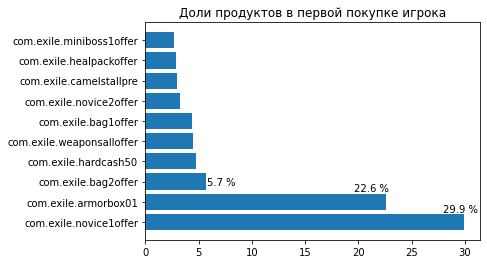

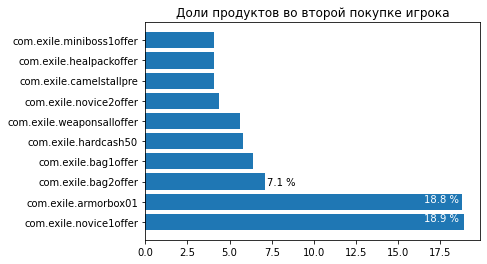

In [51]:
plt.barh(names,prc_1buy)
plt.text(27.9,0.5,'29.9 %')
plt.text(19.6,1.5,'22.6 %')
plt.text(5.8, 1.8,'5.7 %')
plt.title('Доли продуктов в первой покупке игрока')
plt.show()


plt.barh(names1,prc_2buy)
plt.text(16.5, 0.03,'18.9 %', color = 'white')
plt.text(16.5,1,'18.8 %', color = 'white')
plt.text(7.2, 1.8,'7.1 %')
plt.title('Доли продуктов во второй покупке игрока')
plt.show()

Посмотрим на среднюю сумму 1, 2 и 3 платежа и сравним

In [52]:
df_mean = pd.DataFrame({'mean_1buy':dff['payments.Amount_in_USD'].mean(), 
                        'mean_2buy':dff['next_buy_usd'].mean(), 
                        'mean_3buy':dff['3_buy_usd'].mean()}, index=[0])
df_mean


,mean_1buy,mean_2buy,mean_3buy
0,2.999339,3.476453,3.710233


Создадим переменную, показывающую больше ли второй платеж, чем первый.

In [53]:
dff['2nd more 1st'] = np.where(dff['payments.Amount_in_USD'] > dff['next_buy_usd'], 'False', 'True')
dff

,payments.Amount_in_USD,"TO_TIMESTAMP(payments.Date, 'YYYY-MM-DD HH24:MI')",payments.Transaction_ID,payments.Product_name,payments.User_level,next_buy_usd,next_buy_product,3_buy_usd,3_buy_product,2nd more 1st
payments.devtodev_ID,,,,,,,,,,
1339423,2.490000,2021-02-01 03:14,GPA.3357-2926-9454-05912,com.exile.novice1offer,5,11.990000,com.exile.chestoffer3,5.990000,com.exile.hardcash300,True
1339431,0.990000,2021-02-03 04:08,GPA.3300-3783-6970-53717,com.exile.armorbox01,7,1.367918,com.exile.armorbox01,1.367918,com.exile.weaponsalloffer,True
1339439,1.367918,2021-02-01 17:16,GPA.3365-7434-6960-73757,com.exile.armorbox01,6,1.367918,com.exile.weaponsalloffer,1.210568,com.exile.armorbox01,True
1339460,1.210568,2021-02-03 08:48,GPA.3358-1299-3734-50469,com.exile.armorbox01,7,0.990000,com.exile.armorbox01,0.990000,com.exile.weaponsalloffer,False
1339473,0.990000,2021-02-01 05:18,GPA.3346-9503-7571-95095,com.exile.armorbox01,10,0.990000,com.exile.weaponsalloffer,0.990000,com.exile.armorbox01,True
...,...,...,...,...,...,...,...,...,...,...
1518190,1.490091,2021-04-06 15:00,GPA.3316-4024-0687-87088,com.exile.armorbox01,6,4.584896,com.exile.miniboss1offer,1.297187,com.exile.xpboost0,True
1518272,1.297187,2021-04-07 17:12,GPA.3325-8569-2773-90614,com.exile.xpboost0,26,1.258840,com.exile.novice1offer,0.668759,com.exile.armorbox01,False
1518444,1.258840,2021-04-06 17:00,GPA.3360-9342-2516-78860,com.exile.novice1offer,5,0.668759,com.exile.armorbox01,6.990000,com.exile.weaponsallpackoffer,False


Посмотрим, какое количество людей, 2 платеж которых был больше 1.

In [54]:
comp1and2 = dff['2nd more 1st'].value_counts()
df_comp1and2 = pd.DataFrame({'2nd more 1st':comp1and2.index, 'count':comp1and2.values})


In [55]:
prc_comp1and2 = np.round_((np.array(comp1and2)/comp1and2.sum())*100, 2)
names_comp = df_comp1and2['2nd more 1st']

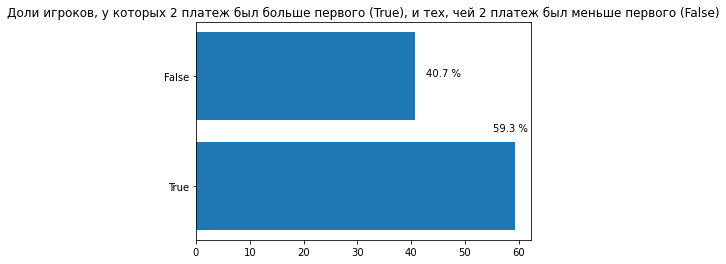

In [56]:
plt.barh(names_comp,prc_comp1and2)
plt.text(55.3,0.5,'59.3 %')
plt.text(42.7,1,'40.7 %')
plt.title('Доли игроков, у которых 2 платеж был больше первого (True), и тех, чей 2 платеж был меньше первого (False)')
plt.show()

# Разрезы по уровням и аналитика первого платежа



Поделим уровни на главы

In [58]:
dff['chapter'] = dff['payments.User_level'].apply(lambda x: '1 chapter' if x < 11 else ('2 chapter' if x > 10 and x < 26 else ('3 chapter' if x > 25 and x < 40 else '4 chapter')))



**Глава 1**

In [59]:
data1 = dff[dff['chapter'] == '1 chapter']

In [60]:
df_mean1 = pd.DataFrame({'mean_1buy':data1['payments.Amount_in_USD'].mean(), 
                        'mean_2buy':data1['next_buy_usd'].mean(), 
                        'mean_3buy':data1['3_buy_usd'].mean()}, index=[0])
df_mean1


,mean_1buy,mean_2buy,mean_3buy
0,2.57764,3.420493,3.562325


In [61]:
dff2 = data1['payments.Product_name'].value_counts()
dff3 = pd.DataFrame({'product':dff2.index, 'count':dff2.values})

_2buy = data1['next_buy_product'].value_counts()
df_2buy =  pd.DataFrame({'product':_2buy.index, 'count':_2buy.values})



prc_1buy = np.round_((np.array(dff2)/dff2.sum())*100, 2)
prc_1buy = prc_1buy[:10]
names = dff3['product'][:10]

prc_2buy = np.round_((np.array(_2buy)/_2buy.sum())*100, 2)
prc_2buy = prc_2buy[:10]
names1 = df_2buy['product'][:10]
prc_1buy

array([42.25, 24.42,  5.41,  5.12,  3.65,  3.22,  2.05,  1.9 ,  1.75,
        1.75])

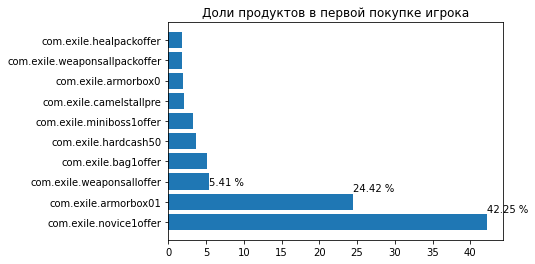

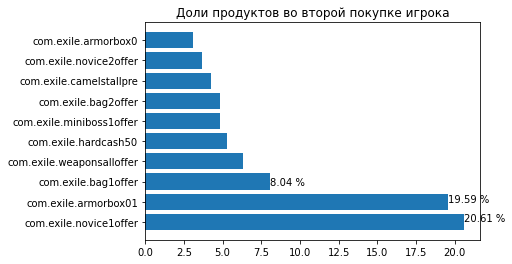

In [62]:
plt.barh(names,prc_1buy)
plt.text(prc_1buy[0],0.5,f'{prc_1buy[0]} %')
plt.text(prc_1buy[1],1.5,f'{prc_1buy[1]} %')
plt.text(prc_1buy[2], 1.8,f'{prc_1buy[2]} %')
plt.title('Доли продуктов в первой покупке игрока')
plt.show()


plt.barh(names1,prc_2buy)
plt.text(prc_2buy[0], 0.03,f'{prc_2buy[0]} %')
plt.text(prc_2buy[1],1,f'{prc_2buy[1]} %')
plt.text(prc_2buy[2], 1.8,f'{prc_2buy[2]} %')
plt.title('Доли продуктов во второй покупке игрока')
plt.show()

**Глава 2**

In [63]:
data2 = dff[dff['chapter'] == '2 chapter']

In [64]:
df_mean2 = pd.DataFrame({'mean_1buy':data2['payments.Amount_in_USD'].mean(), 
                        'mean_2buy':data2['next_buy_usd'].mean(), 
                        'mean_3buy':data2['3_buy_usd'].mean()}, index=[0])
df_mean2

,mean_1buy,mean_2buy,mean_3buy
0,3.941683,3.829921,4.321753


In [65]:
dff2 = data2['payments.Product_name'].value_counts()
dff3 = pd.DataFrame({'product':dff2.index, 'count':dff2.values})

_2buy = data2['next_buy_product'].value_counts()
df_2buy =  pd.DataFrame({'product':_2buy.index, 'count':_2buy.values})



prc_1buy = np.round_((np.array(dff2)/dff2.sum())*100, 2)
prc_1buy = prc_1buy[:10]
names = dff3['product'][:10]

prc_2buy = np.round_((np.array(_2buy)/_2buy.sum())*100, 2)
prc_2buy = prc_2buy[:10]
names1 = df_2buy['product'][:10]
prc_1buy

array([19.76, 11.86, 11.46,  7.91,  5.53,  4.35,  4.35,  4.35,  3.95,
        3.56])

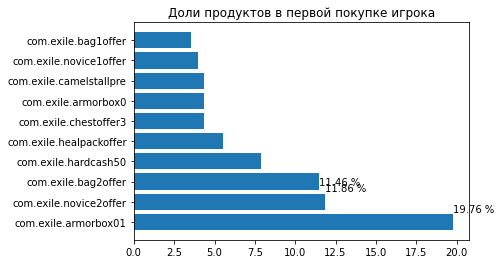

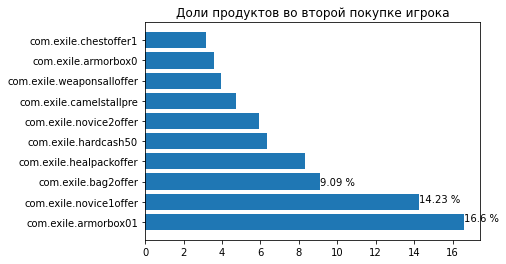

In [66]:
plt.barh(names,prc_1buy)
plt.text(prc_1buy[0],0.5,f'{prc_1buy[0]} %')
plt.text(prc_1buy[1],1.5,f'{prc_1buy[1]} %')
plt.text(prc_1buy[2], 1.8,f'{prc_1buy[2]} %')
plt.title('Доли продуктов в первой покупке игрока')
plt.show()


plt.barh(names1,prc_2buy)
plt.text(prc_2buy[0], 0.03,f'{prc_2buy[0]} %')
plt.text(prc_2buy[1],1,f'{prc_2buy[1]} %')
plt.text(prc_2buy[2], 1.8,f'{prc_2buy[2]} %')
plt.title('Доли продуктов во второй покупке игрока')
plt.show()

**Глава 3**

In [67]:
data3 = dff[dff['chapter'] == '3 chapter']

In [68]:
df_mean3 = pd.DataFrame({'mean_1buy':data3['payments.Amount_in_USD'].mean(), 
                        'mean_2buy':data3['next_buy_usd'].mean(), 
                        'mean_3buy':data3['3_buy_usd'].mean()}, index=[0])
df_mean3

,mean_1buy,mean_2buy,mean_3buy
0,3.04804,2.790992,3.211993


In [69]:
dff2 = data3['payments.Product_name'].value_counts()
dff3 = pd.DataFrame({'product':dff2.index, 'count':dff2.values})

_2buy = data3['next_buy_product'].value_counts()
df_2buy =  pd.DataFrame({'product':_2buy.index, 'count':_2buy.values})



prc_1buy = np.round_((np.array(dff2)/dff2.sum())*100, 2)
prc_1buy = prc_1buy[:10]
names = dff3['product'][:10]

prc_2buy = np.round_((np.array(_2buy)/_2buy.sum())*100, 2)
prc_2buy = prc_2buy[:10]
names1 = df_2buy['product'][:10]
prc_1buy

array([43.59, 20.51,  7.69,  5.13,  5.13,  5.13,  2.56,  2.56,  2.56,
        2.56])

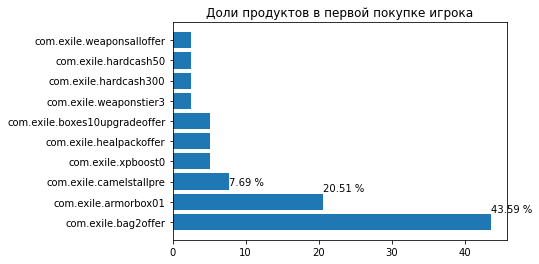

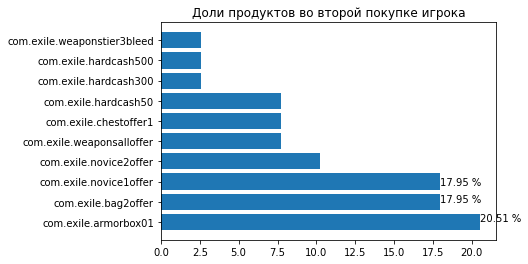

In [70]:
plt.barh(names,prc_1buy)
plt.text(prc_1buy[0],0.5,f'{prc_1buy[0]} %')
plt.text(prc_1buy[1],1.5,f'{prc_1buy[1]} %')
plt.text(prc_1buy[2], 1.8,f'{prc_1buy[2]} %')
plt.title('Доли продуктов в первой покупке игрока')
plt.show()


plt.barh(names1,prc_2buy)
plt.text(prc_2buy[0], 0.03,f'{prc_2buy[0]} %')
plt.text(prc_2buy[1],1,f'{prc_2buy[1]} %')
plt.text(prc_2buy[2], 1.8,f'{prc_2buy[2]} %')
plt.title('Доли продуктов во второй покупке игрока')
plt.show()

**Глава 4**

In [71]:
data4 = dff[dff['chapter'] == '4 chapter']

In [72]:
df_mean4 = pd.DataFrame({'mean_1buy':data4['payments.Amount_in_USD'].mean(), 
                        'mean_2buy':data4['next_buy_usd'].mean(), 
                        'mean_3buy':data4['3_buy_usd'].mean()}, index=[0])
df_mean4

,mean_1buy,mean_2buy,mean_3buy
0,5.004749,2.459035,2.288785


In [73]:
dff2 = data4['payments.Product_name'].value_counts()
dff3 = pd.DataFrame({'product':dff2.index, 'count':dff2.values})

_2buy = data4['next_buy_product'].value_counts()
df_2buy =  pd.DataFrame({'product':_2buy.index, 'count':_2buy.values})



prc_1buy = np.round_((np.array(dff2)/dff2.sum())*100, 2)
prc_1buy = prc_1buy[:10]
names = dff3['product'][:10]

prc_2buy = np.round_((np.array(_2buy)/_2buy.sum())*100, 2)
prc_2buy = prc_2buy[:10]
names1 = df_2buy['product'][:10]

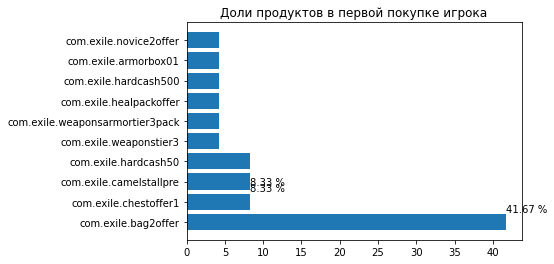

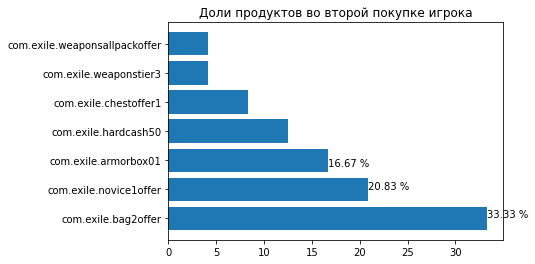

In [74]:
plt.barh(names,prc_1buy)
plt.text(prc_1buy[0],0.5,f'{prc_1buy[0]} %')
plt.text(prc_1buy[1],1.5,f'{prc_1buy[1]} %')
plt.text(prc_1buy[2], 1.8,f'{prc_1buy[2]} %')
plt.title('Доли продуктов в первой покупке игрока')
plt.show()


plt.barh(names1,prc_2buy)
plt.text(prc_2buy[0], 0.03,f'{prc_2buy[0]} %')
plt.text(prc_2buy[1],1,f'{prc_2buy[1]} %')
plt.text(prc_2buy[2], 1.8,f'{prc_2buy[2]} %')
plt.title('Доли продуктов во второй покупке игрока')
plt.show()

**Распределение количества игроков, сделавших 1 покупку в главе**

In [75]:
a = dff['chapter'].value_counts()
df_forperc = pd.DataFrame({'chapter':a.index, 'count':a.values})


y= np.round_((np.array(a)/a.sum())*100, 2)
names = df_forperc['chapter']
y

array([68.4, 25.3,  3.9,  2.4])

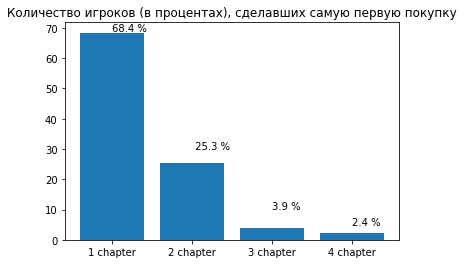

In [76]:
plt.bar(names,y)
plt.text('1 chapter',69,'68.4 %')
plt.text('2 chapter',30,' 25.3 %')
plt.text('3 chapter', 10,'3.9 %')
plt.text('4 chapter', 5,'2.4 %')
plt.title('Количество игроков (в процентах), сделавших самую первую покупку')
plt.show()
